In [4]:
import numpy as np 
import pandas as pd 
import pickle

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
sys.path.append('..')

from utils.viz import viz 
from utils.model import *  
from utils.fig_fn import *
viz.get_style()

In [5]:
exp = 'exp2'
agents = ['rmPG_fea', 'caPG_fea', 'ecPG_fea']
method = 'mle'
dpi = 300

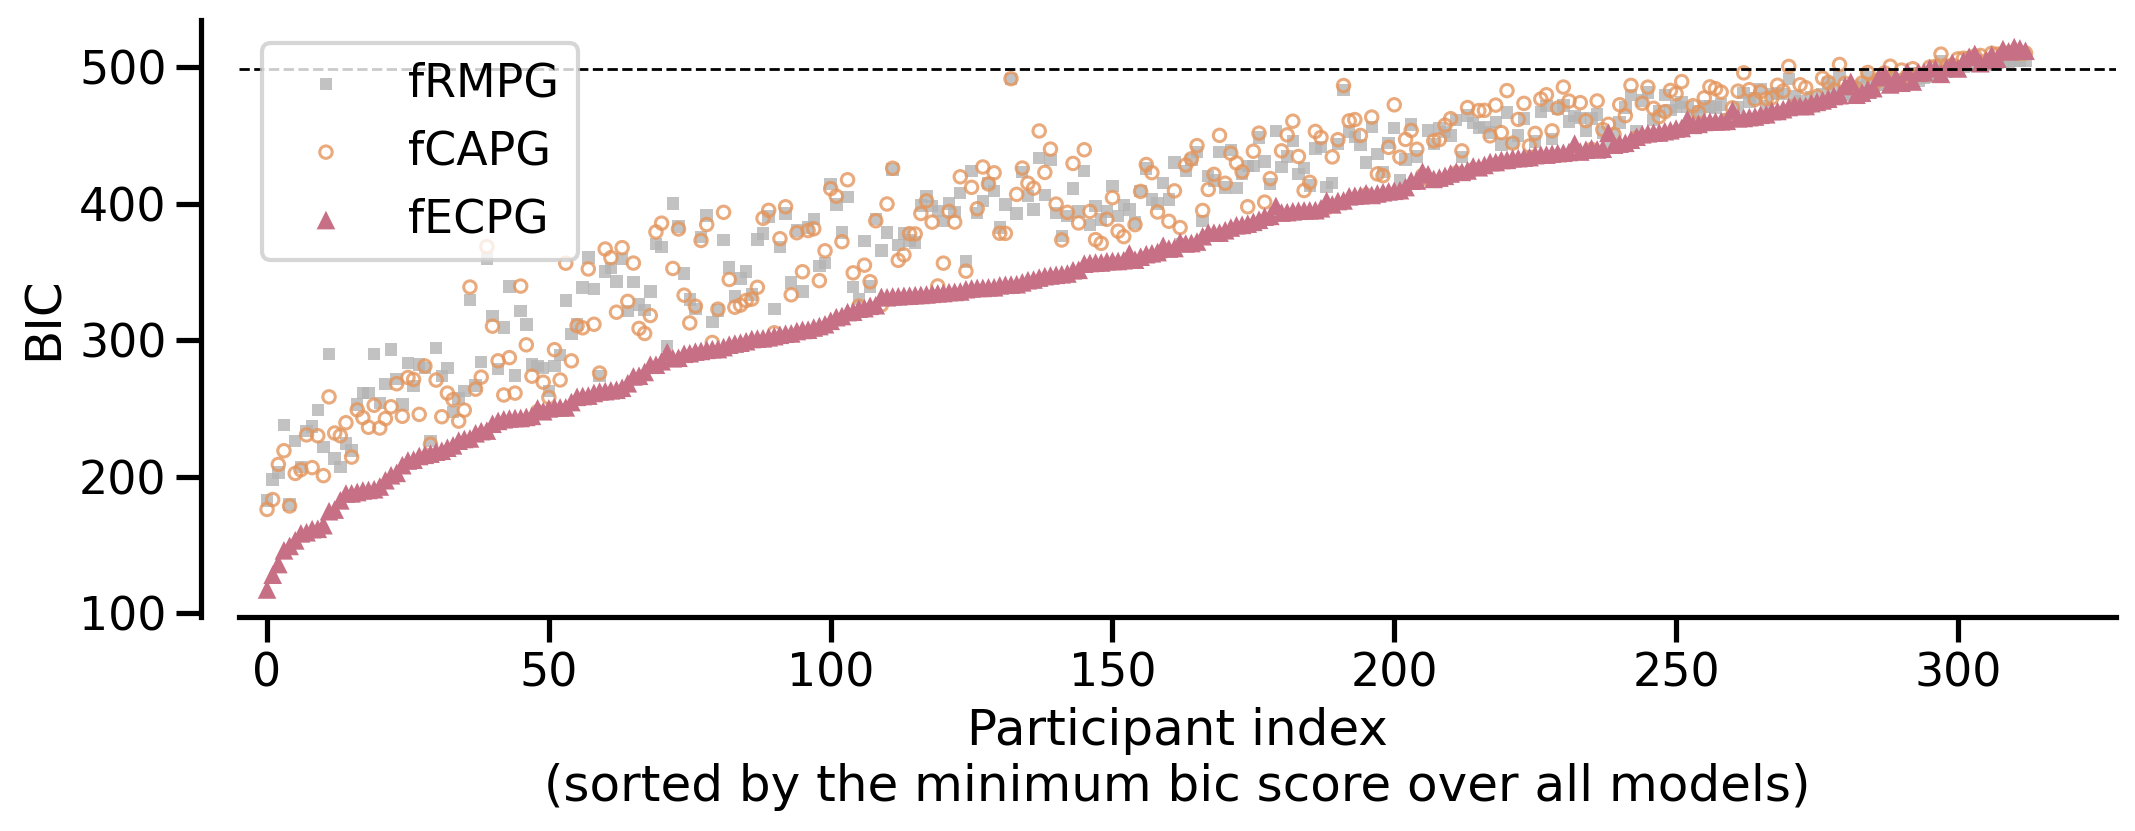

In [6]:
crs_table = get_crs(exp=exp, agents=agents, method=method)
viz_model_cmp(crs_table, exp=exp, agents=agents, crs='bic')
plt.savefig(f'../figures/{exp}/Fig5A1_model_cmp.pdf', dpi=dpi)
    

trained:
           n         r           CI95%          p-val       BF10  power
pearson  313 -0.935958  [-0.95, -0.92]  5.024247e-143  8.54e+138    1.0
untrained:
           n         r           CI95%         p-val       BF10  power
pearson  313 -0.499312  [-0.58, -0.41]  3.860848e-21  1.239e+18    1.0


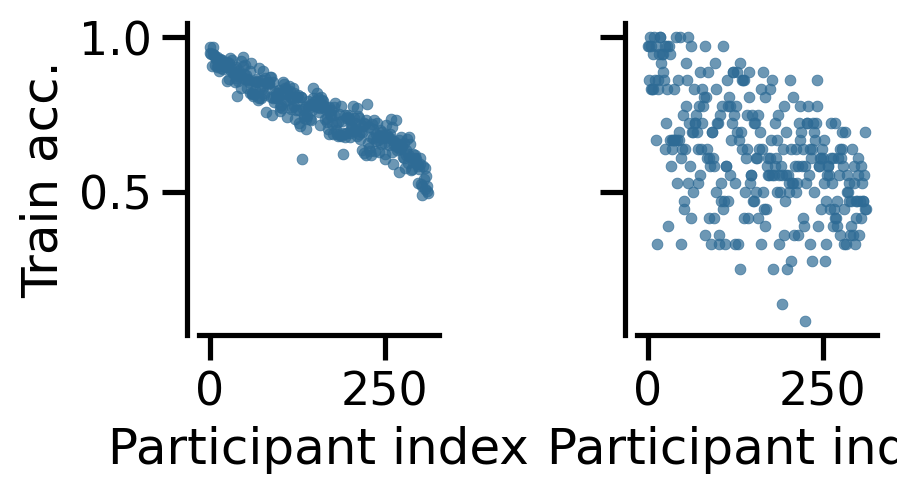

In [7]:
viz_corr(crs_table, exp=exp, agents=agents, crs='bic')
plt.savefig(f'../figures/{exp}/Fig5A2_corr.pdf', dpi=dpi)    

[0. 0. 1.]


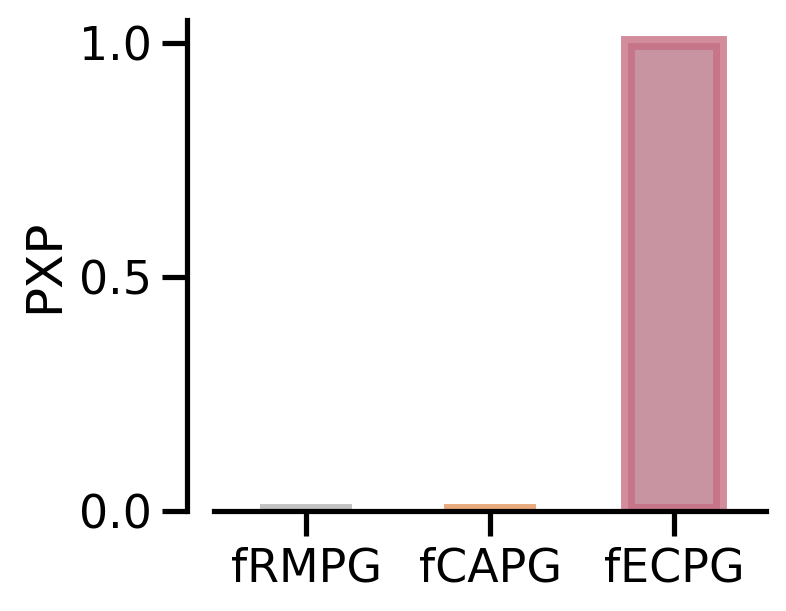

In [8]:
viz_pxp(exp, agents, method=method)
plt.savefig(f'../figures/{exp}/Fig5B_pxp.pdf', dpi=dpi)


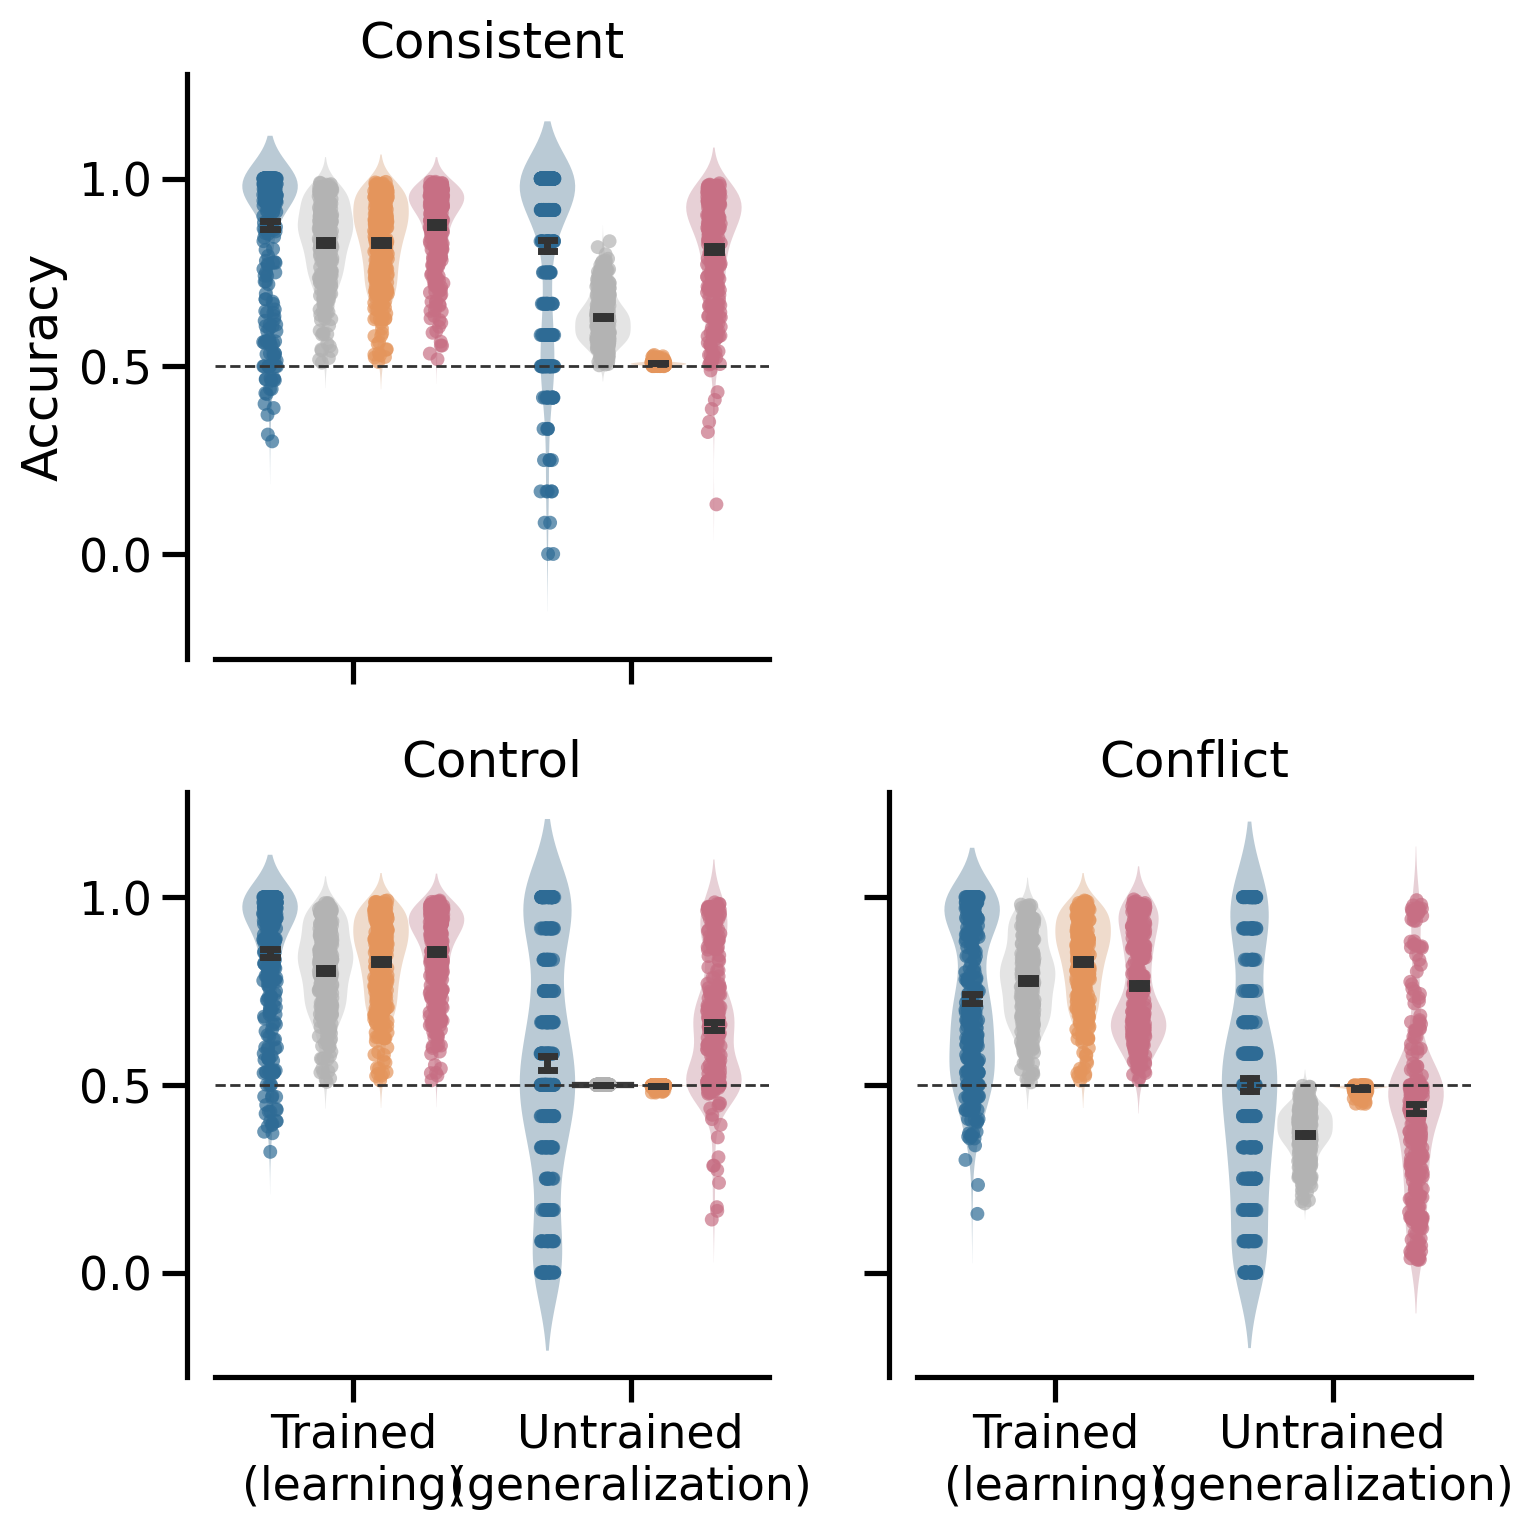

In [9]:
viz_transfer_cond(exp, agents=['human']+agents, method=method)
plt.savefig(f'../figures/{exp}/Fig5C_transfer_cond.pdf', dpi=dpi)

In [10]:
def viz_lc_cond(exp, agents, method='mle'):
    data = [] 
    conds = ['cons', 'cont', 'conf']
    for agent in agents:
        df = pd.read_csv(f'{pth}/../analyses/{exp}/{agent}/{method}-base.csv')
        df['agent'] = agent
        data.append(df)
    data = pd.concat(data, axis=0)
    data['block_type'] = data['block_type']

    nr, nc = len(agents), 1
    fig, axs = plt.subplots(nr, nc, figsize=(4.8, 2.3*nr), sharey=True, sharex=True)
    for i, agent in enumerate(agents):
        ax = axs[i]
        sel_data = data.query(f'group in ["trained", "control"] & agent=="{agent}"')
        sel_data = sel_data.groupby(by=['sub_id', 'tps', 'stage',
                    'agent', 'block_type']).mean(numeric_only=True).reset_index()
        sel_data['tps'] = sel_data.apply(
                lambda x: x['tps']+10 if x['stage']=='test' else x['tps'], axis=1)
        sns.lineplot(x='tps', y='acc', data=sel_data, 
                    err_style='bars', err_kws={'capsize': 3, 'elinewidth':2},
                    hue='block_type', hue_order=conds, alpha=.7,
                    palette=viz.Pal_type, lw=3,
                    errorbar='se', ax=ax)
        ax.vlines(x=10, ymin=.4, ymax=1, color='k', ls='--', lw=1.5)
        ax.set_xticks([0, 5, 10, 15])
        ax.set_xticklabels(['1', '6', '11', '16'])
        ax.set_xlabel('')
        ax.set_ylabel('Acc. (%)')
        ax.set_ylim([.4, 1])
        ax.spines['left'].set_position(('axes',-0.05))
        ax.set_title(f'{eval(agents[i]).name}')
        ax.get_legend().remove()
    fig.tight_layout()

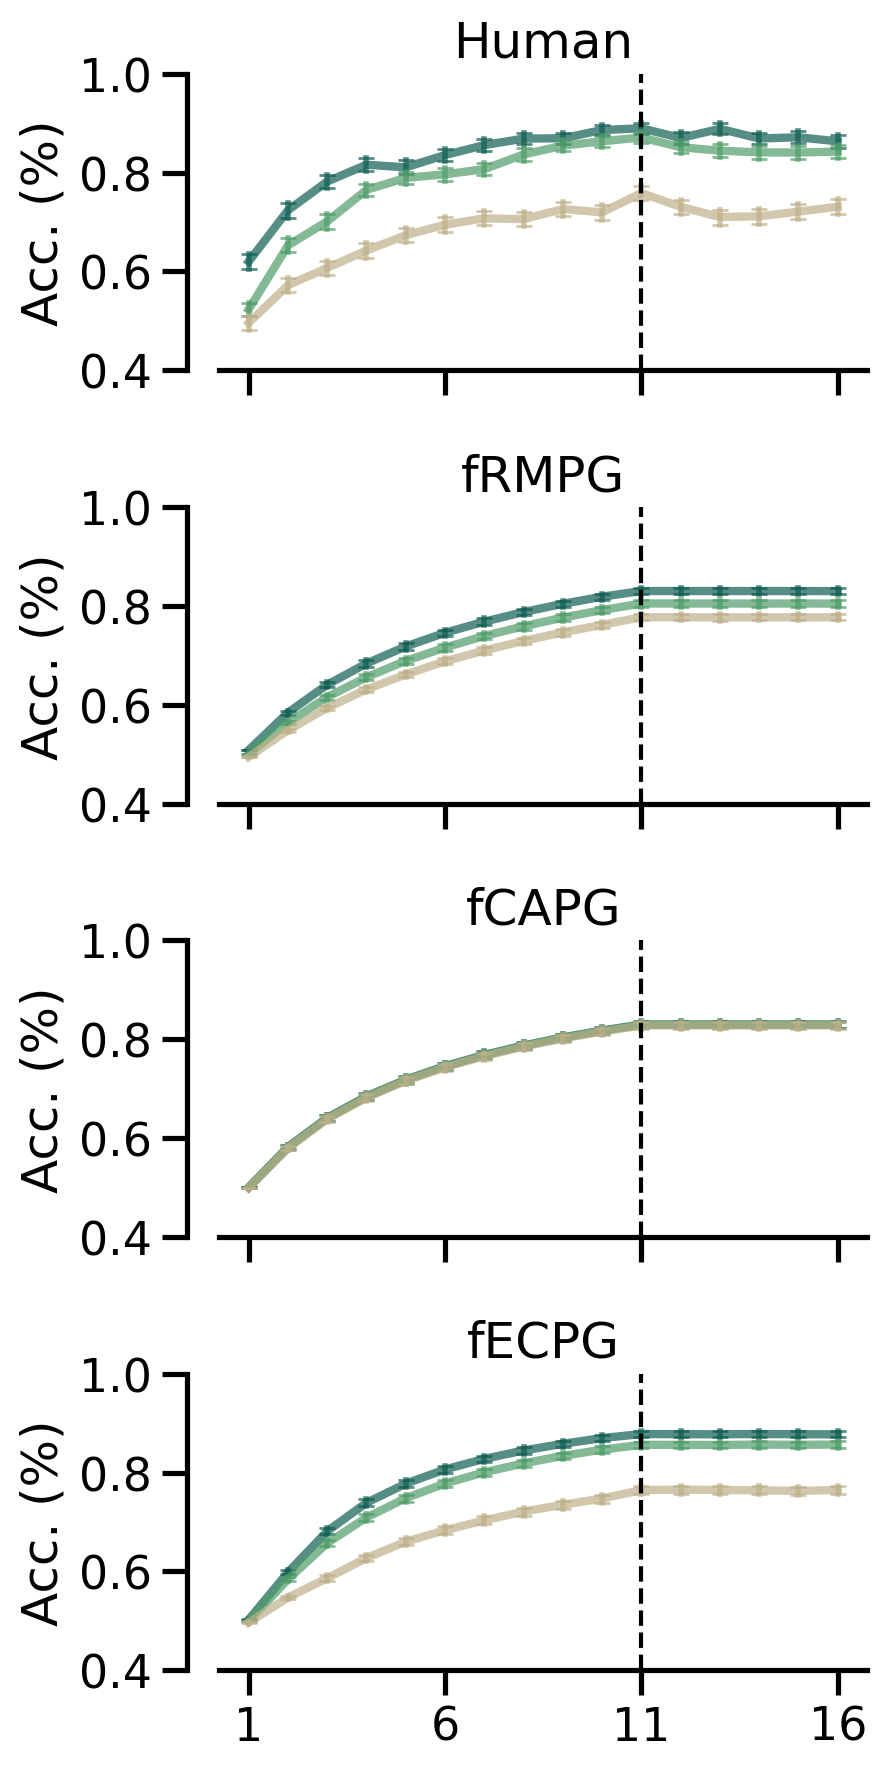

In [11]:
viz_lc_cond(exp, agents=['human']+agents, method=method)
plt.savefig(f'../figures/{exp}/Fig5D_lr_cond.pdf', dpi=dpi)
    